In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot
import numpy
import pandas
from scipy import stats
import seaborn
import sys

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['agg.path.chunksize'] = 10000
print(f'Package versions:\nPython {sys.version}, matplotlib {matplotlib.__version__}, '
      f'numpy {numpy.__version__}, pandas {pandas.__version__}, '
      f'scipy {sys.modules["scipy"].__version__}, seaborn {seaborn.__version__}')

Package versions:
Python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0], matplotlib 3.4.2, numpy 1.21.0, pandas 1.1.5, scipy 1.7.0, seaborn 0.11.1


First, run the SCI-LITE pipeline with the command line found in cmd_line.txt.

In [5]:
drop_dups = pandas.read_csv('./read_dataframe.csv')
print(drop_dups.shape)
drop_dups.head()

(8875932, 12)


,well_id,r1,r2,seq_corr,edit_type,umi,bc_tracer,het_spacer_offset,bc1_corr,bc2_corr,condition,read_count
0,A1,TAGCATTCTCATCCAAACCCCCTGAAGCTTCTCCGGCCCTTTTTTT...,CCTCCTTTTGCTCTTCCTCTTTCTTTTTTTCTACTTTCTCCCCGTT...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1
1,A1,GCCATTCTCTCCAAACCCCCTGAAGCTTCACCTTCGCAATTATTCT...,CCTCCTTTTTCTCTTCCTCTTTACTTTTTCCTTCTTCCTCCACTTT...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1
2,A1,TTAGCCATTCTCATCCAAACCCCCTGAATCTTCTCCTCCCCTTTTT...,CCTCCTTTTTCTCTTCCTCCTTTTCTCTTCGTTCTTCCTCCCCGTT...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1
3,A1,TAAGTAGCCATTCTCATCCAAACCCCCTTAAGCTTCACCGTCTCAT...,CCTACTTGTTCTCTTCCTCTTTTTTTCAATCTATTTCATCCCCGTT...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1
4,A1,GTAGCCATTCTCATCCAAACCCCCTGAATCTTCACCGGCGCTGTTT...,CCTCCTTGTTCTCTTCCGCTTTTTTTATATATTCTTTCTCCACGTT...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1


In [6]:
all_stats = drop_dups.groupby('edit_type')['read_count'].sum()
all_stats['TOTAL'] = all_stats.sum()
all_stats = all_stats.rename('read_count').reset_index().sort_values(by='read_count', ascending=False)
all_stats

,edit_type,read_count
10,TOTAL,14630691
5,SILENT,7489548
9,WT,3299255
1,LHON_BY1,2565681
8,UNKNOWN,740961
2,LHON_BY2,114898
3,LHON_BY3,114163
6,SILENT_BY1,105625
4,LHON_BY4,101955
7,SILENT_BY2,55817


In [2]:
scilite_data = pandas.read_csv('./heteroplasmy_dataframe.csv')
scilite_data.columns = scilite_data.columns.str.replace('_HET', '_het')
print(scilite_data.shape)
scilite_data.head()

(15078, 13)


,cell_id,condition,umi_count,LHON,LHON/SILENT,SILENT,WT,umi_count_for_filtering,umi_count_rank,LHON_het,SILENT_het,SILENT_ONLY_het,total_het
0,A1-CCGTGAGA-TGCCAGCC,d5_silent_r1,61,0,0,52,9,61,3649,0.000000,0.852459,0.852459,0.852459
1,A1-ACGCTCGA-TGTCTCAT,d0_silent_r3,65,0,0,61,4,65,3091,0.000000,0.938462,0.938462,0.938462
2,A1-AGTACAAG-GCATGCCG,d0_lhon_r3,44,0,32,12,0,44,7158,0.727273,1.000000,0.272727,1.000000
3,A1-ACTCTTAG-GTTGCTGT,d10_silent_r3,64,0,0,47,17,64,3223,0.000000,0.734375,0.734375,0.734375
4,A1-CGAACTTA-TGCCAGCC,d5_silent_r1,93,0,0,91,2,93,1068,0.000000,0.978495,0.978495,0.978495


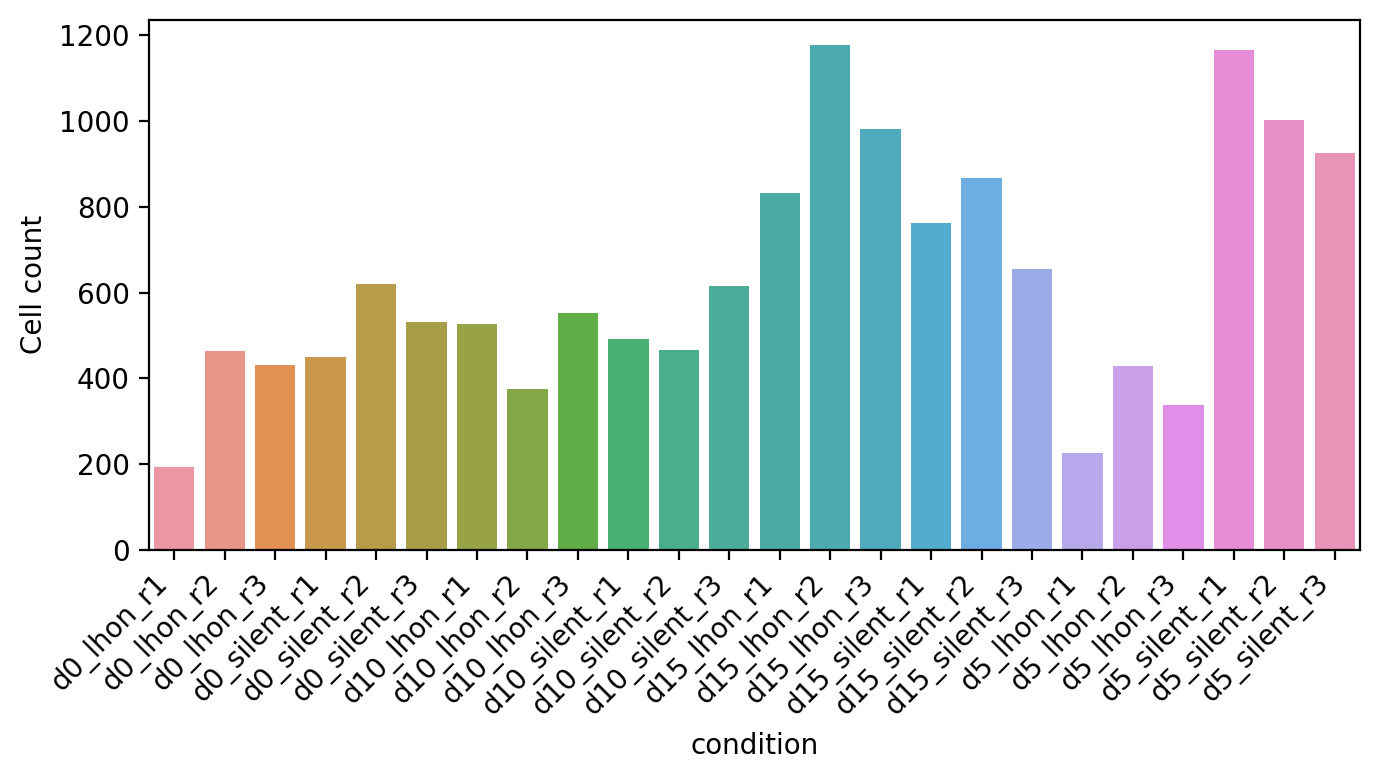

In [3]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(7,4))
xorder = sorted(scilite_data['condition'].unique())
seaborn.countplot(data=scilite_data, x='condition', order=xorder, ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylabel('Cell count')
fig.tight_layout()

In [4]:
scilite_data['condition_no_rep'] = scilite_data['condition'].str.split('_r', expand=True)[0]

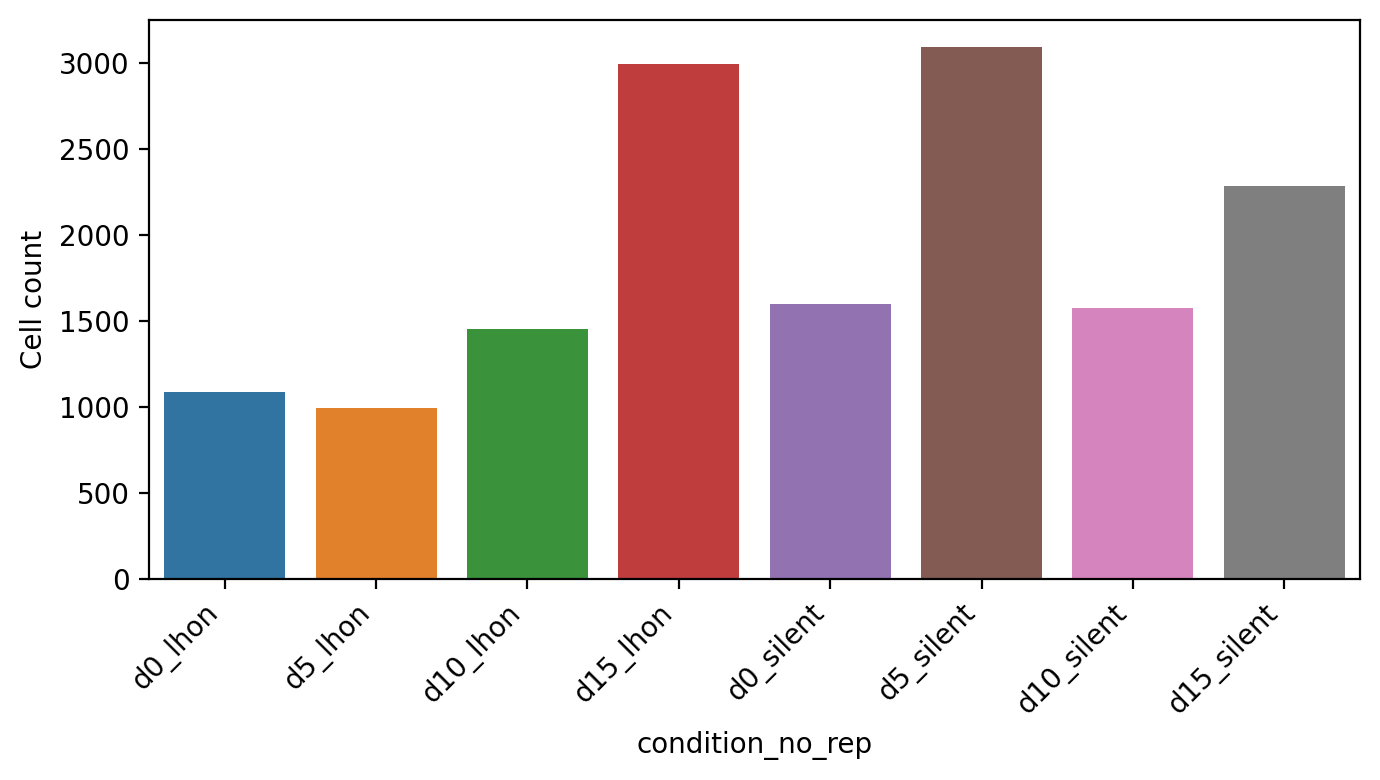

In [5]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(7,4))
xorder = ['d0_lhon', 'd5_lhon', 'd10_lhon', 'd15_lhon', 'd0_silent', 'd5_silent', 'd10_silent', 'd15_silent']
seaborn.countplot(data=scilite_data, x='condition_no_rep', order=xorder, ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.set_ylabel('Cell count')
fig.tight_layout()

In [6]:
bulk_estimates = pandas.read_csv('../Bulk_LHON_timeseries/bulk_lhon_timeseries.count_data.csv')
bulk_estimates = bulk_estimates[(bulk_estimates['Sorting'] == 'HIGH') & (bulk_estimates['Treatment'] != 'GAL')]
print(bulk_estimates.shape)
bulk_estimates

(48, 24)


,Sample ID,Cell line,Sorting,Treatment,Treatment time,Input,rep,edit,sample_id,sample_id_norep,LHON,LHON_BY1,LHON_BY2,LHON_BY3,LHON_BY4,SILENT,SILENT_BY1,SILENT_BY2,UNKNOWN,WT,TOTAL,LHON_het,SILENT_het,TOTAL_het
6,A7,1LHON,HIGH,0,0,DNA,1,LHON,LHON-HIGH_0_0-rep1,LHON-HIGH_0_0,115.0,8525.0,469.0,464.0,427.0,3873.0,257.0,127.0,834.0,975.0,15232.0,0.656513,0.279477,0.936051
7,A8,2LHON,HIGH,0,0,DNA,2,LHON,LHON-HIGH_0_0-rep2,LHON-HIGH_0_0,90.0,7752.0,407.0,429.0,374.0,3412.0,268.0,116.0,773.0,743.0,13591.0,0.666029,0.279302,0.945401
8,A9,3LHON,HIGH,0,0,DNA,3,LHON,LHON-HIGH_0_0-rep3,LHON-HIGH_0_0,132.0,11402.0,633.0,630.0,582.0,5076.0,383.0,195.0,1117.0,1739.0,20772.0,0.644088,0.272193,0.916326
9,A10,1Silent,HIGH,0,0,DNA,1,Silent,Silent-HIGH_0_0-rep1,Silent-HIGH_0_0,1.0,1.0,0.0,1.0,0.0,13161.0,1.0,5.0,154.0,5627.0,18797.0,0.000160,0.700484,0.700681
10,A11,2Silent,HIGH,0,0,DNA,2,Silent,Silent-HIGH_0_0-rep2,Silent-HIGH_0_0,2.0,6.0,0.0,0.0,0.0,13870.0,3.0,4.0,160.0,6185.0,20070.0,0.000399,0.691430,0.691863
11,A12,3Silent,HIGH,0,0,DNA,3,Silent,Silent-HIGH_0_0-rep3,Silent-HIGH_0_0,1.0,9.0,0.0,0.0,0.0,11313.0,0.0,2.0,146.0,4934.0,16259.0,0.000615,0.695922,0.696580
18,B7,1LHON,HIGH,GLU,5,DNA,1,LHON,LHON-HIGH_GLU_5-rep1,LHON-HIGH_GLU_5,201.0,10798.0,544.0,556.0,476.0,6717.0,396.0,204.0,1084.0,2310.0,22202.0,0.566390,0.329565,0.895996
19,B8,2LHON,HIGH,GLU,5,DNA,2,LHON,LHON-HIGH_GLU_5-rep2,LHON-HIGH_GLU_5,169.0,9448.0,512.0,495.0,484.0,5598.0,341.0,190.0,963.0,2001.0,19238.0,0.577399,0.318588,0.896034
20,B9,3LHON,HIGH,GLU,5,DNA,3,LHON,LHON-HIGH_GLU_5-rep3,LHON-HIGH_GLU_5,147.0,7785.0,457.0,458.0,356.0,4591.0,298.0,163.0,769.0,2110.0,16365.0,0.562359,0.308708,0.871120
21,B10,1Silent,HIGH,GLU,5,DNA,1,Silent,Silent-HIGH_GLU_5-rep1,Silent-HIGH_GLU_5,1.0,5.0,0.0,0.0,2.0,14497.0,5.0,4.0,232.0,6197.0,20711.0,0.000386,0.700401,0.700821


In [7]:
sample_map = {'LHON-HIGH_0_0':'d0_lhon',
              'Silent-HIGH_0_0':'d0_silent',
              'LHON-HIGH_GLU_5':'d5_lhon',
              'Silent-HIGH_GLU_5':'d5_silent',
              'LHON-HIGH_GLU_10':'d10_lhon',
              'Silent-HIGH_GLU_10':'d10_silent',
              'LHON-HIGH_GLU_15':'d15_lhon',
              'Silent-HIGH_GLU_15':'d15_silent'}
bulk_estimates['sci-lite_sample_id_norep'] = [sample_map[elt] for elt in bulk_estimates['sample_id_norep'].to_numpy()]
bulk_estimates['sci-lite_sample_id'] = bulk_estimates['sci-lite_sample_id_norep'] + '_r' + bulk_estimates['rep'].astype(str)
bulk_estimates.head()

,Sample ID,Cell line,Sorting,Treatment,Treatment time,Input,rep,edit,sample_id,sample_id_norep,LHON,LHON_BY1,LHON_BY2,LHON_BY3,LHON_BY4,SILENT,SILENT_BY1,SILENT_BY2,UNKNOWN,WT,TOTAL,LHON_het,SILENT_het,TOTAL_het,sci-lite_sample_id_norep,sci-lite_sample_id
6,A7,1LHON,HIGH,0,0,DNA,1,LHON,LHON-HIGH_0_0-rep1,LHON-HIGH_0_0,115.0,8525.0,469.0,464.0,427.0,3873.0,257.0,127.0,834.0,975.0,15232.0,0.656513,0.279477,0.936051,d0_lhon,d0_lhon_r1
7,A8,2LHON,HIGH,0,0,DNA,2,LHON,LHON-HIGH_0_0-rep2,LHON-HIGH_0_0,90.0,7752.0,407.0,429.0,374.0,3412.0,268.0,116.0,773.0,743.0,13591.0,0.666029,0.279302,0.945401,d0_lhon,d0_lhon_r2
8,A9,3LHON,HIGH,0,0,DNA,3,LHON,LHON-HIGH_0_0-rep3,LHON-HIGH_0_0,132.0,11402.0,633.0,630.0,582.0,5076.0,383.0,195.0,1117.0,1739.0,20772.0,0.644088,0.272193,0.916326,d0_lhon,d0_lhon_r3
9,A10,1Silent,HIGH,0,0,DNA,1,Silent,Silent-HIGH_0_0-rep1,Silent-HIGH_0_0,1.0,1.0,0.0,1.0,0.0,13161.0,1.0,5.0,154.0,5627.0,18797.0,0.000160,0.700484,0.700681,d0_silent,d0_silent_r1
10,A11,2Silent,HIGH,0,0,DNA,2,Silent,Silent-HIGH_0_0-rep2,Silent-HIGH_0_0,2.0,6.0,0.0,0.0,0.0,13870.0,3.0,4.0,160.0,6185.0,20070.0,0.000399,0.691430,0.691863,d0_silent,d0_silent_r2


In [8]:
bulk_estimates['LHON_total'] = bulk_estimates[['LHON', 'LHON_BY1', 'LHON_BY2', 'LHON_BY3', 'LHON_BY4']].sum(axis=1)
bulk_estimates['SILENT_total'] = bulk_estimates[['SILENT', 'SILENT_BY1', 'SILENT_BY2']].sum(axis=1)

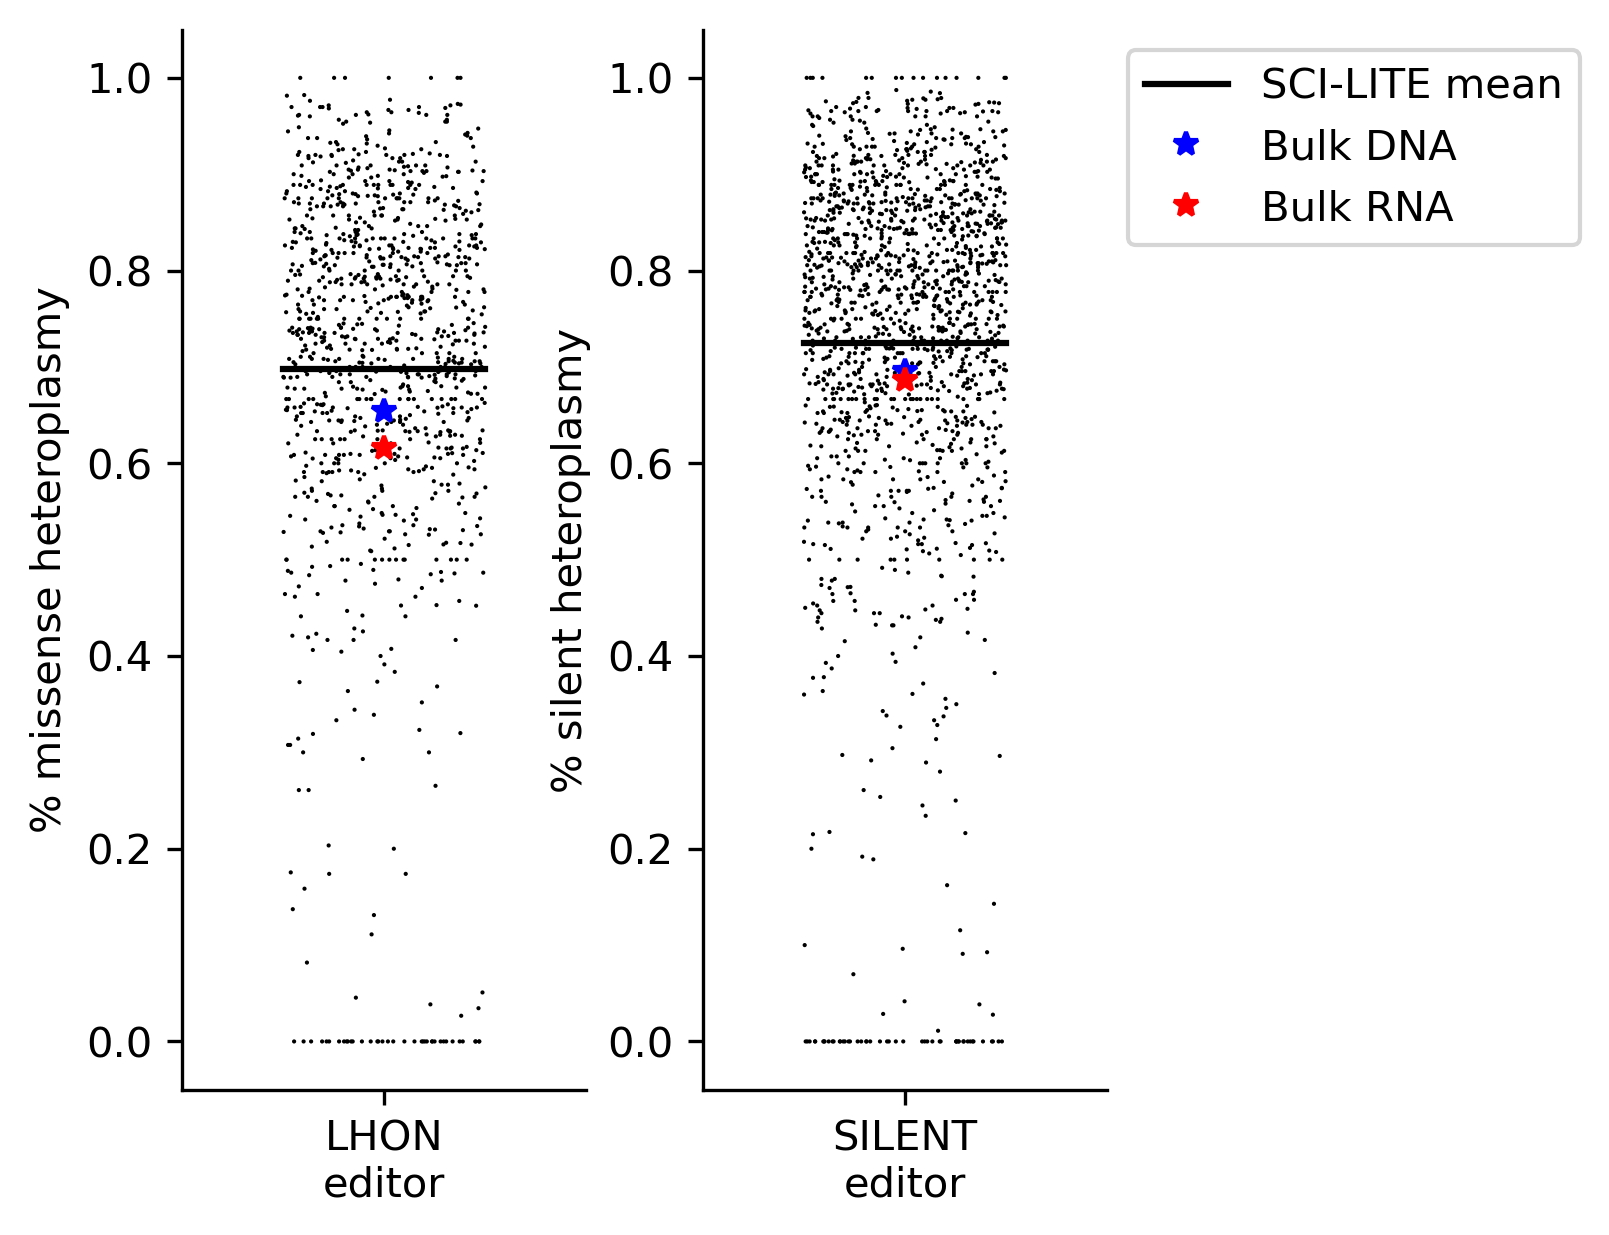

In [17]:
fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(4,4), dpi=300, gridspec_kw={'width_ratios':[1,1]})

#LHON editor plot
to_plot = scilite_data.loc[scilite_data['condition_no_rep'] == 'd0_lhon']
seaborn.stripplot(data=to_plot, x='condition_no_rep', y='LHON_het', dodge=True, color='k', s=1, ax=axes[0])
axes[0].plot([-0.1, 0.1], [to_plot['LHON_het'].mean()]*2, color='k', marker=None, zorder=100, label='mean het estimate')
to_plot = (bulk_estimates.loc[bulk_estimates['sci-lite_sample_id_norep'] == 'd0_lhon', ['Input', 'LHON_total', 'TOTAL']]
           .groupby('Input').sum())
axes[0].plot(0, numpy.divide(*to_plot.loc['DNA'].values), color='blue', marker='*', linestyle='', zorder=100, label='bulk DNA het')
axes[0].plot(0, numpy.divide(*to_plot.loc['RNA'].values), color='red', marker='*', linestyle='', zorder=100, label='bulk RNA het')
axes[0].set_xlim((-0.2, 0.2))
axes[0].set_xticks([0])
axes[0].set_xticklabels(['LHON\neditor'])
axes[0].set_xlabel('')
axes[0].set_ylabel('% missense heteroplasmy')

#SILENT editor plot
to_plot = scilite_data.loc[scilite_data['condition_no_rep'] == 'd0_silent']
seaborn.stripplot(data=to_plot, x='condition_no_rep', y='SILENT_het', dodge=True, color='k', s=1, ax=axes[1])
axes[1].plot([-0.1, 0.1], [to_plot['SILENT_het'].mean()]*2, color='k', marker=None, zorder=100, label='SCI-LITE mean')
to_plot = (bulk_estimates.loc[bulk_estimates['sci-lite_sample_id_norep'] == 'd0_silent', ['Input', 'SILENT_total', 'TOTAL']]
           .groupby('Input').sum())
axes[1].plot(0, numpy.divide(*to_plot.loc['DNA'].values), color='blue', marker='*', linestyle='', zorder=100, label='Bulk DNA')
axes[1].plot(0, numpy.divide(*to_plot.loc['RNA'].values), color='red', marker='*', linestyle='', zorder=100, label='Bulk RNA')
axes[1].set_xlim((-0.2, 0.2))
axes[1].set_xticks([0])
axes[1].set_xticklabels(['SILENT\neditor'])
axes[1].set_xlabel('')
axes[1].set_ylabel('% silent heteroplasmy')

axes[1].legend(loc='upper left', bbox_to_anchor=[1,1])

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.savefig('./day0_lhon_and_silent_scilite_vs_bulk_cmp_stripplots.pdf', bbox_inches='tight')
fig.tight_layout()

## Total edits heteroplasmy

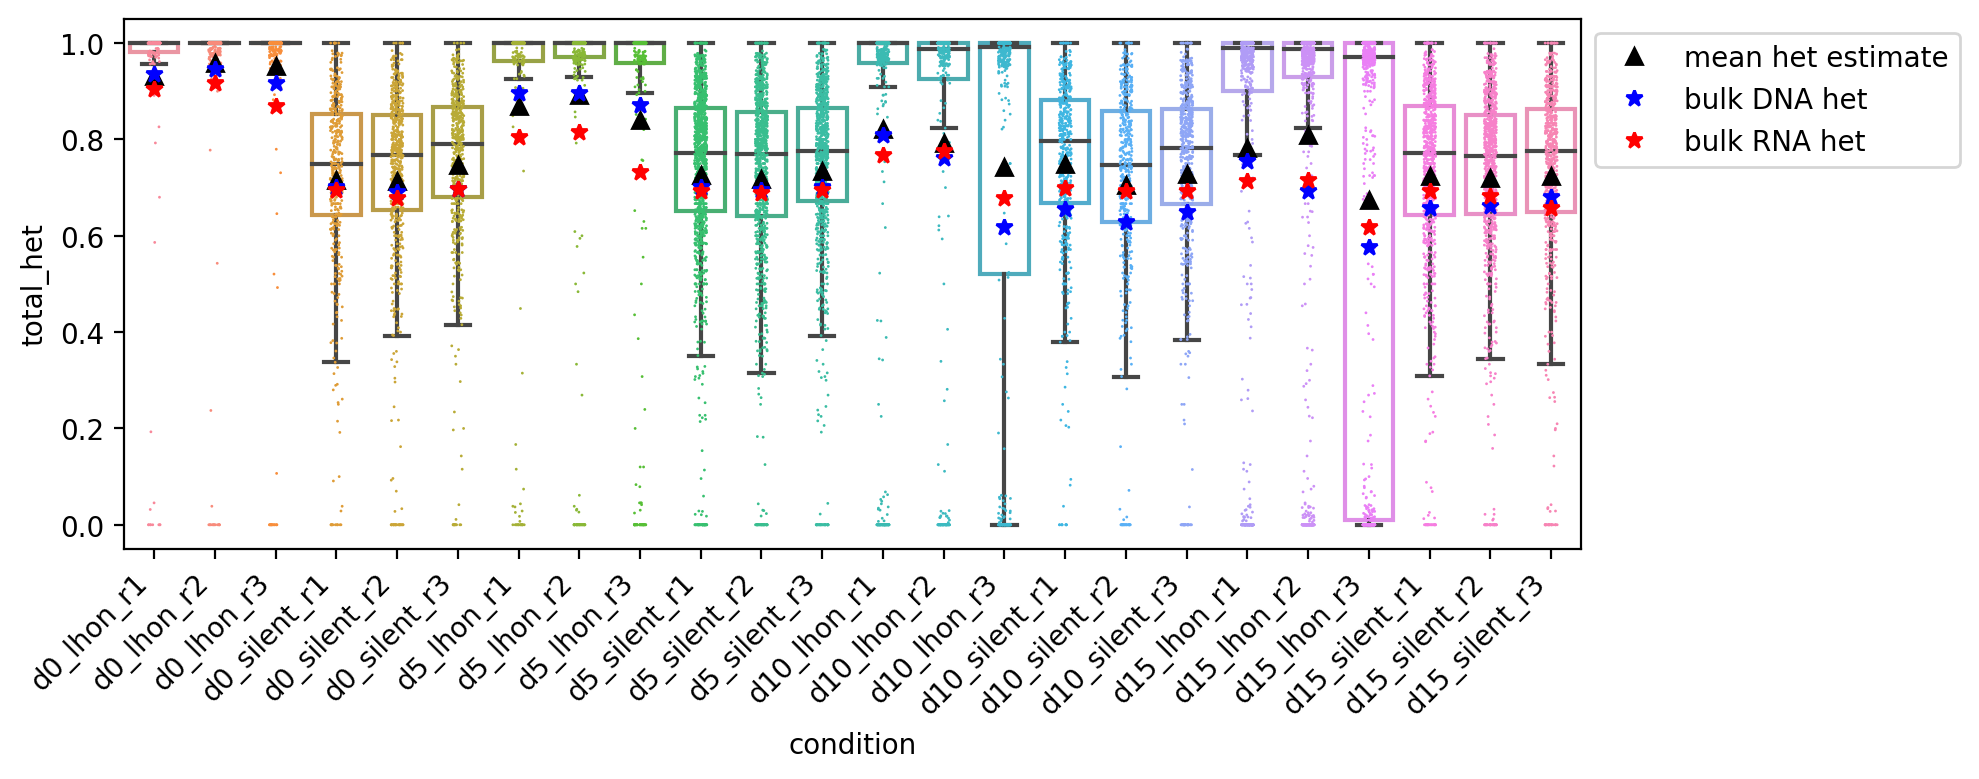

In [18]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
#xorder = bc1_list.loc[bc1_list['condition'].isin(scilite_data['condition']), 'condition'].unique()
xorder = sorted(scilite_data['condition'].unique(), key=lambda x:(int(x.split('_')[0][1:]), x.split('_')[1:]))
seaborn.boxplot(data=scilite_data, x='condition', y='total_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=scilite_data, x='condition', y='total_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), scilite_data.groupby('condition')['total_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
dna_bulk_hets = []
rna_bulk_hets = []
for sname in xorder:
    dna_bulk_hets.append(bulk_estimates.loc[(bulk_estimates['sci-lite_sample_id'] == sname)
                                            & (bulk_estimates['Input'] == 'DNA'), 'TOTAL_het'].to_numpy()[0])
    rna_bulk_hets.append(bulk_estimates.loc[(bulk_estimates['sci-lite_sample_id'] == sname)
                                            & (bulk_estimates['Input'] == 'RNA'), 'TOTAL_het'].to_numpy()[0])
axes.plot(xpos, dna_bulk_hets, color='blue', marker='*', linestyle='', zorder=100, label='bulk DNA het')
axes.plot(xpos, rna_bulk_hets, color='red', marker='*', linestyle='', zorder=100, label='bulk RNA het')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

### LHON + LHON/SILENT heteroplasmy

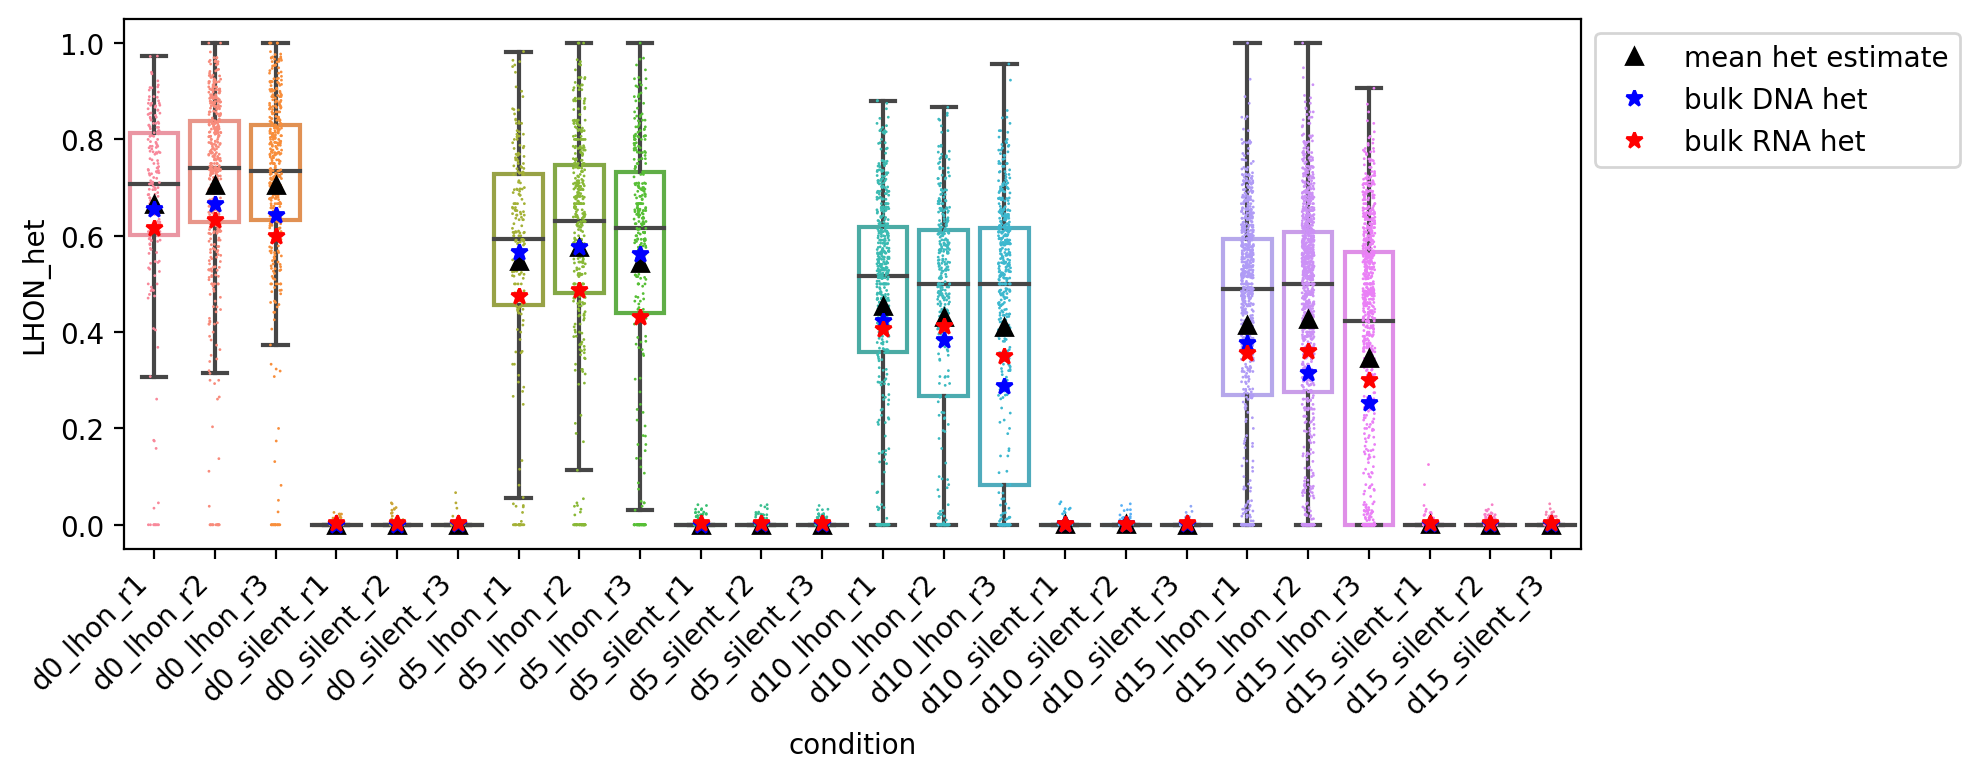

In [19]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
#xorder = bc1_list.loc[bc1_list['condition'].isin(scilite_data['condition']), 'condition'].unique()
xorder = sorted(scilite_data['condition'].unique(), key=lambda x:(int(x.split('_')[0][1:]), x.split('_')[1:]))
seaborn.boxplot(data=scilite_data, x='condition', y='LHON_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=scilite_data, x='condition', y='LHON_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), scilite_data.groupby('condition')['LHON_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
dna_bulk_hets = []
rna_bulk_hets = []
for sname in xorder:
    dna_bulk_hets.append(bulk_estimates.loc[(bulk_estimates['sci-lite_sample_id'] == sname)
                                            & (bulk_estimates['Input'] == 'DNA'), 'LHON_het'].to_numpy()[0])
    rna_bulk_hets.append(bulk_estimates.loc[(bulk_estimates['sci-lite_sample_id'] == sname)
                                            & (bulk_estimates['Input'] == 'RNA'), 'LHON_het'].to_numpy()[0])
axes.plot(xpos, dna_bulk_hets, color='blue', marker='*', linestyle='', zorder=100, label='bulk DNA het')
axes.plot(xpos, rna_bulk_hets, color='red', marker='*', linestyle='', zorder=100, label='bulk RNA het')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

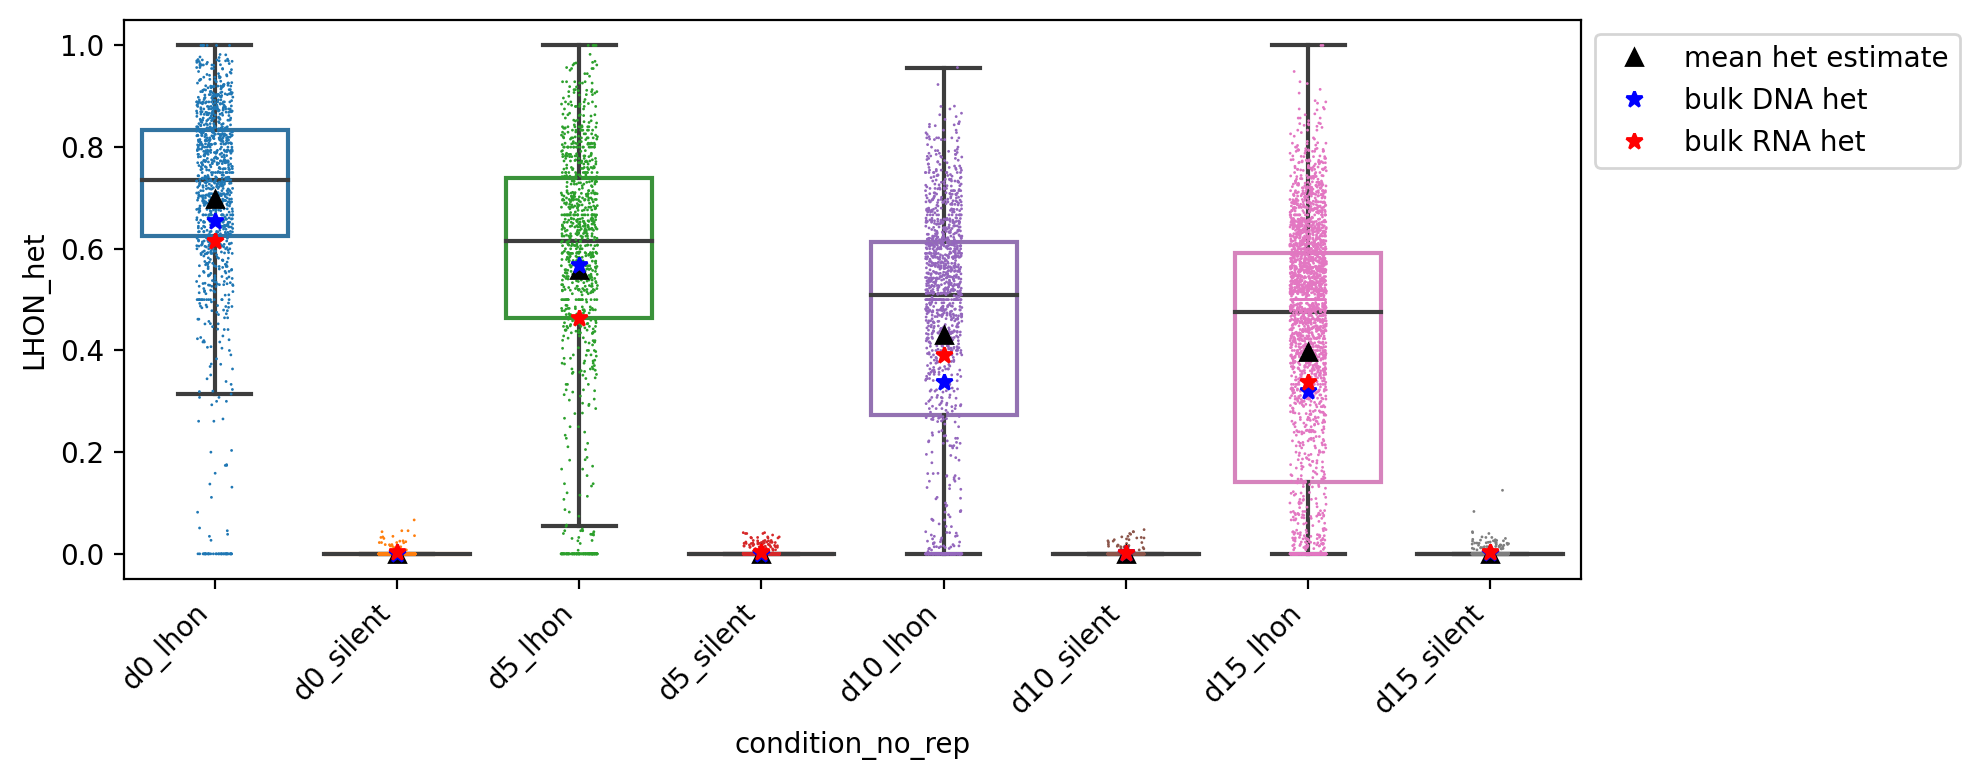

In [20]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
#xorder = bc1_list.loc[bc1_list['condition_no_rep'].isin(scilite_data['condition_no_rep']), 'condition_no_rep'].unique()
xorder = sorted(scilite_data['condition_no_rep'].unique(), key=lambda x:(int(x.split('_')[0][1:]), x.split('_')[1:]))
seaborn.boxplot(data=scilite_data, x='condition_no_rep', y='LHON_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=scilite_data, x='condition_no_rep', y='LHON_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), scilite_data.groupby('condition_no_rep')['LHON_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
dna_bulk_hets = []
rna_bulk_hets = []
for sname in xorder:
    sidx = (bulk_estimates['sci-lite_sample_id_norep'] == sname) & (bulk_estimates['Input'] == 'DNA')
    dna_bulk_hets.append(bulk_estimates.loc[sidx, ['LHON', 'LHON_BY1', 'LHON_BY2', 
                                                   'LHON_BY3', 'LHON_BY4']].to_numpy().sum()
                         / bulk_estimates.loc[sidx, 'TOTAL'].to_numpy().sum())
    
    sidx = (bulk_estimates['sci-lite_sample_id_norep'] == sname) & (bulk_estimates['Input'] == 'RNA')
    rna_bulk_hets.append(bulk_estimates.loc[sidx, ['LHON', 'LHON_BY1', 'LHON_BY2', 
                                                   'LHON_BY3', 'LHON_BY4']].to_numpy().sum()
                         / bulk_estimates.loc[sidx, 'TOTAL'].to_numpy().sum())
axes.plot(xpos, dna_bulk_hets, color='blue', marker='*', linestyle='', zorder=100, label='bulk DNA het')
axes.plot(xpos, rna_bulk_hets, color='red', marker='*', linestyle='', zorder=100, label='bulk RNA het')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

### Just SILENT heteroplasmy

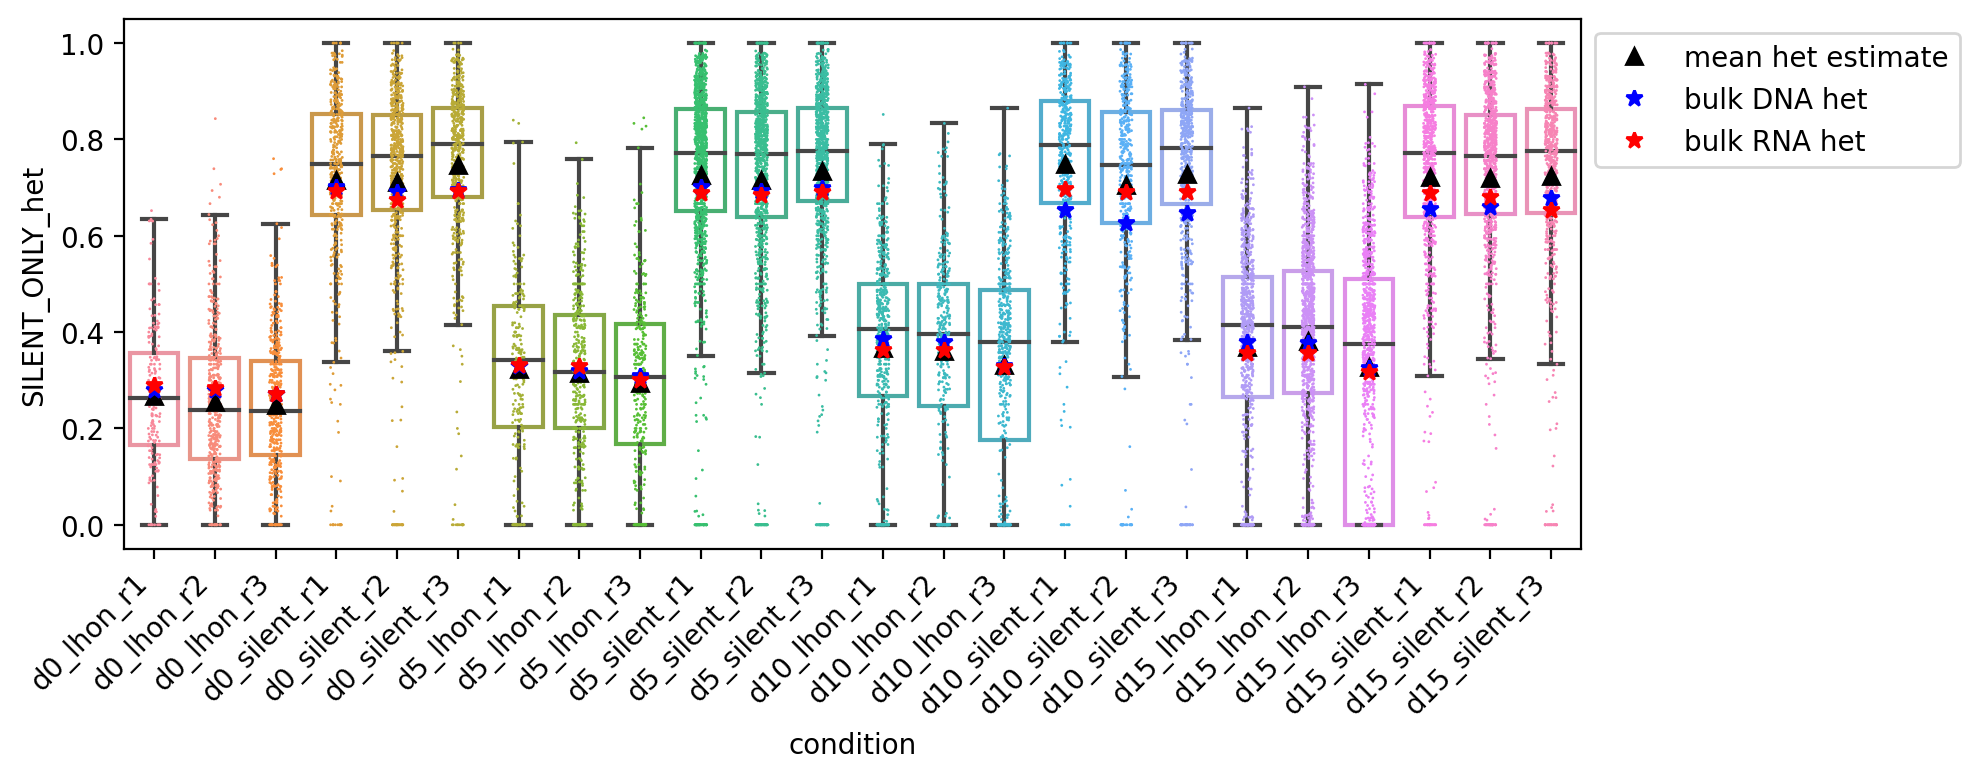

In [21]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
#xorder = bc1_list.loc[bc1_list['condition'].isin(scilite_data['condition']), 'condition'].unique()
xorder = sorted(scilite_data['condition'].unique(), key=lambda x:(int(x.split('_')[0][1:]), x.split('_')[1:]))
seaborn.boxplot(data=scilite_data, x='condition', y='SILENT_ONLY_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=scilite_data, x='condition', y='SILENT_ONLY_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), scilite_data.groupby('condition')['SILENT_ONLY_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
dna_bulk_hets = []
rna_bulk_hets = []
for sname in xorder:
    dna_bulk_hets.append(bulk_estimates.loc[(bulk_estimates['sci-lite_sample_id'] == sname)
                                            & (bulk_estimates['Input'] == 'DNA'), 'SILENT_het'].to_numpy()[0])
    rna_bulk_hets.append(bulk_estimates.loc[(bulk_estimates['sci-lite_sample_id'] == sname)
                                            & (bulk_estimates['Input'] == 'RNA'), 'SILENT_het'].to_numpy()[0])
axes.plot(xpos, dna_bulk_hets, color='blue', marker='*', linestyle='', zorder=100, label='bulk DNA het')
axes.plot(xpos, rna_bulk_hets, color='red', marker='*', linestyle='', zorder=100, label='bulk RNA het')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

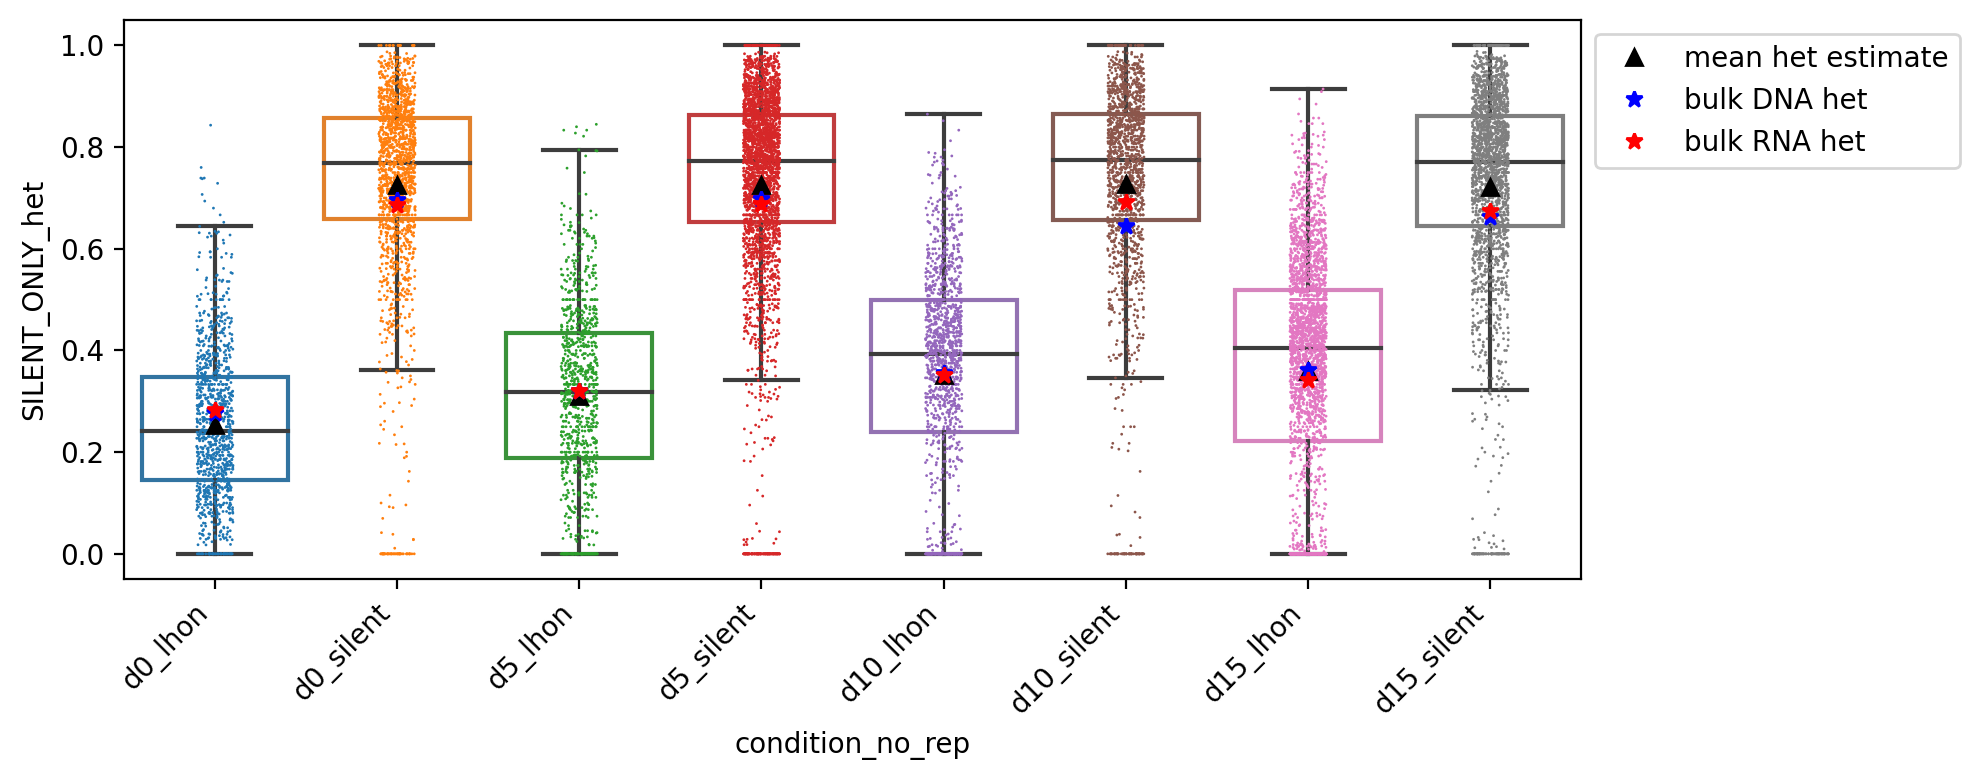

In [22]:
fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
#xorder = bc1_list.loc[bc1_list['condition_no_rep'].isin(scilite_data['condition_no_rep']), 'condition_no_rep'].unique()
xorder = sorted(scilite_data['condition_no_rep'].unique(), key=lambda x:(int(x.split('_')[0][1:]), x.split('_')[1:]))
seaborn.boxplot(data=scilite_data, x='condition_no_rep', y='SILENT_ONLY_het', ax=axes, order=xorder, showfliers=False)
seaborn.stripplot(data=scilite_data, x='condition_no_rep', y='SILENT_ONLY_het', dodge=True, s=1, order=xorder, ax=axes)
axes.plot(numpy.arange(len(xorder)), scilite_data.groupby('condition_no_rep')['SILENT_ONLY_het'].mean()[xorder],
          color='k', marker='^', linestyle='', zorder=100, label='mean het estimate')

xpos = numpy.arange(len(xorder))
dna_bulk_hets = []
rna_bulk_hets = []
for sname in xorder:
    sidx = (bulk_estimates['sci-lite_sample_id_norep'] == sname) & (bulk_estimates['Input'] == 'DNA')
    dna_bulk_hets.append(bulk_estimates.loc[sidx, ['SILENT', 'SILENT_BY1', 'SILENT_BY2']].to_numpy().sum()
                         / bulk_estimates.loc[sidx, 'TOTAL'].to_numpy().sum())
    
    sidx = (bulk_estimates['sci-lite_sample_id_norep'] == sname) & (bulk_estimates['Input'] == 'RNA')
    rna_bulk_hets.append(bulk_estimates.loc[sidx, ['SILENT', 'SILENT_BY1', 'SILENT_BY2']].to_numpy().sum()
                         / bulk_estimates.loc[sidx, 'TOTAL'].to_numpy().sum())
axes.plot(xpos, dna_bulk_hets, color='blue', marker='*', linestyle='', zorder=100, label='bulk DNA het')
axes.plot(xpos, rna_bulk_hets, color='red', marker='*', linestyle='', zorder=100, label='bulk RNA het')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45)
axes.legend(bbox_to_anchor=[1,1])

fig.tight_layout()

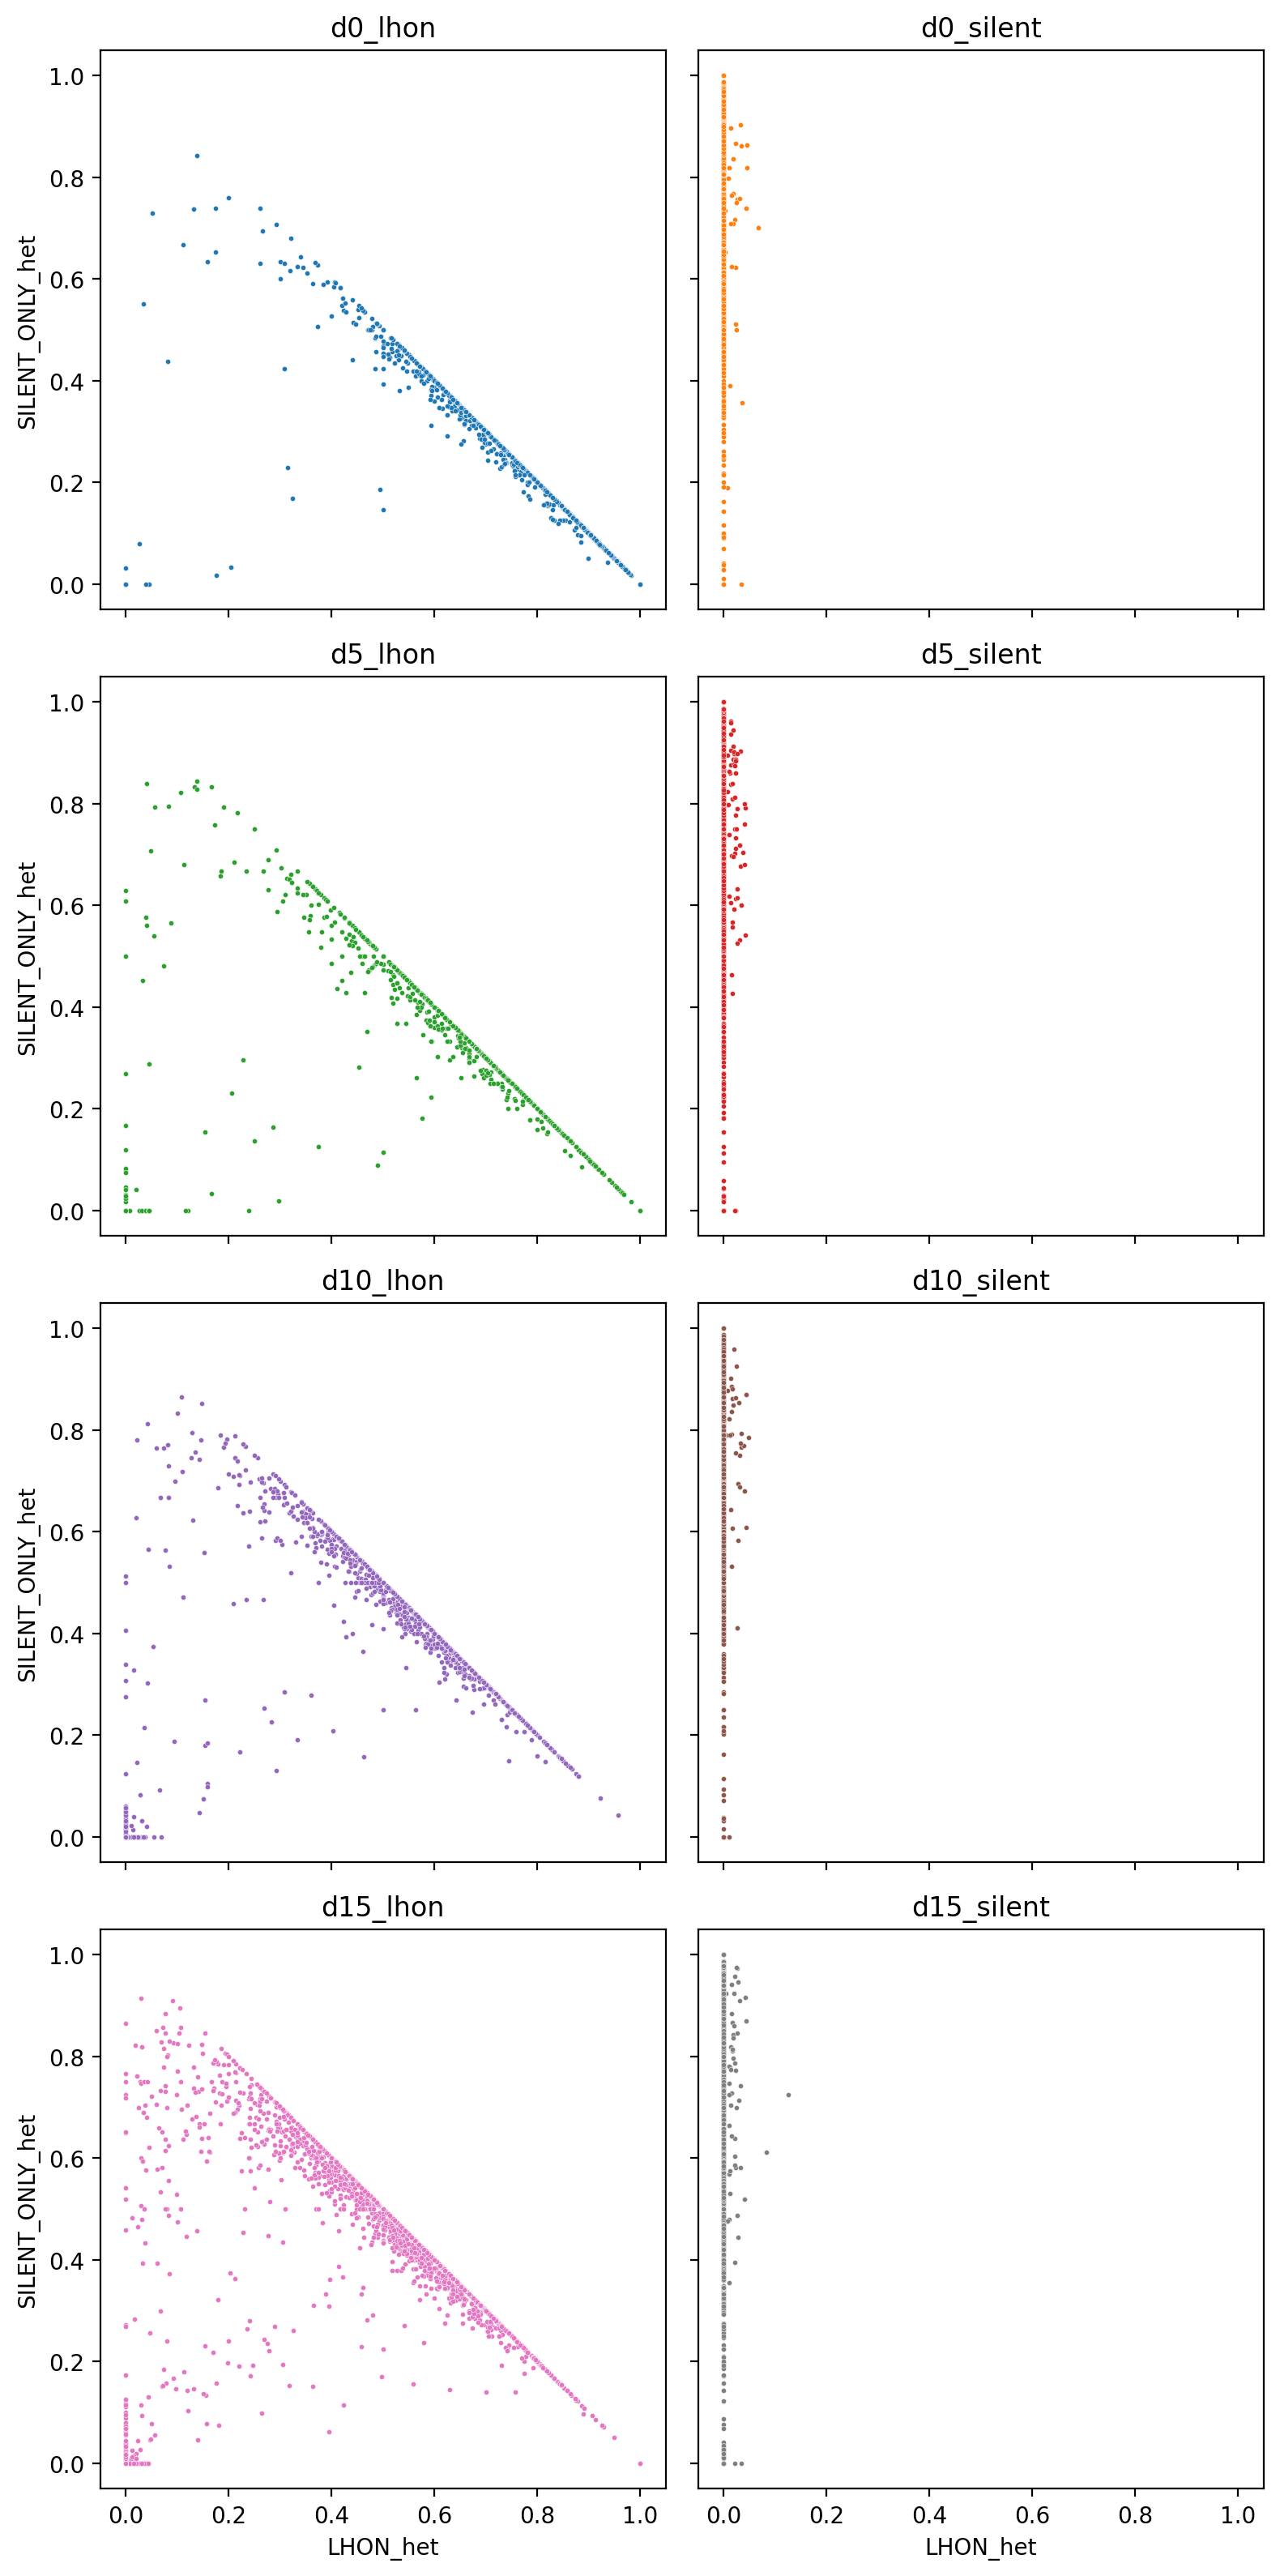

In [23]:
fig, axes = pyplot.subplots(nrows=4, ncols=2, figsize=(8,16), sharey=True, sharex=True)
xorder = sorted(scilite_data['condition_no_rep'].unique(), key=lambda x:(int(x.split('_')[0][1:]), x.split('_')[1:]))
for idx, cond in enumerate(xorder):
    ax_idx = (idx//2, idx%2)
    seaborn.scatterplot(data=scilite_data.loc[scilite_data['condition_no_rep'] == cond], 
                        x='LHON_het', y='SILENT_ONLY_het', color=f'C{idx}', s=5, ax=axes[ax_idx])
    axes[ax_idx].set_xlim((-0.05, 1.05))
    axes[ax_idx].set_ylim((-0.05, 1.05))
    axes[ax_idx].set_title(cond)
fig.tight_layout()

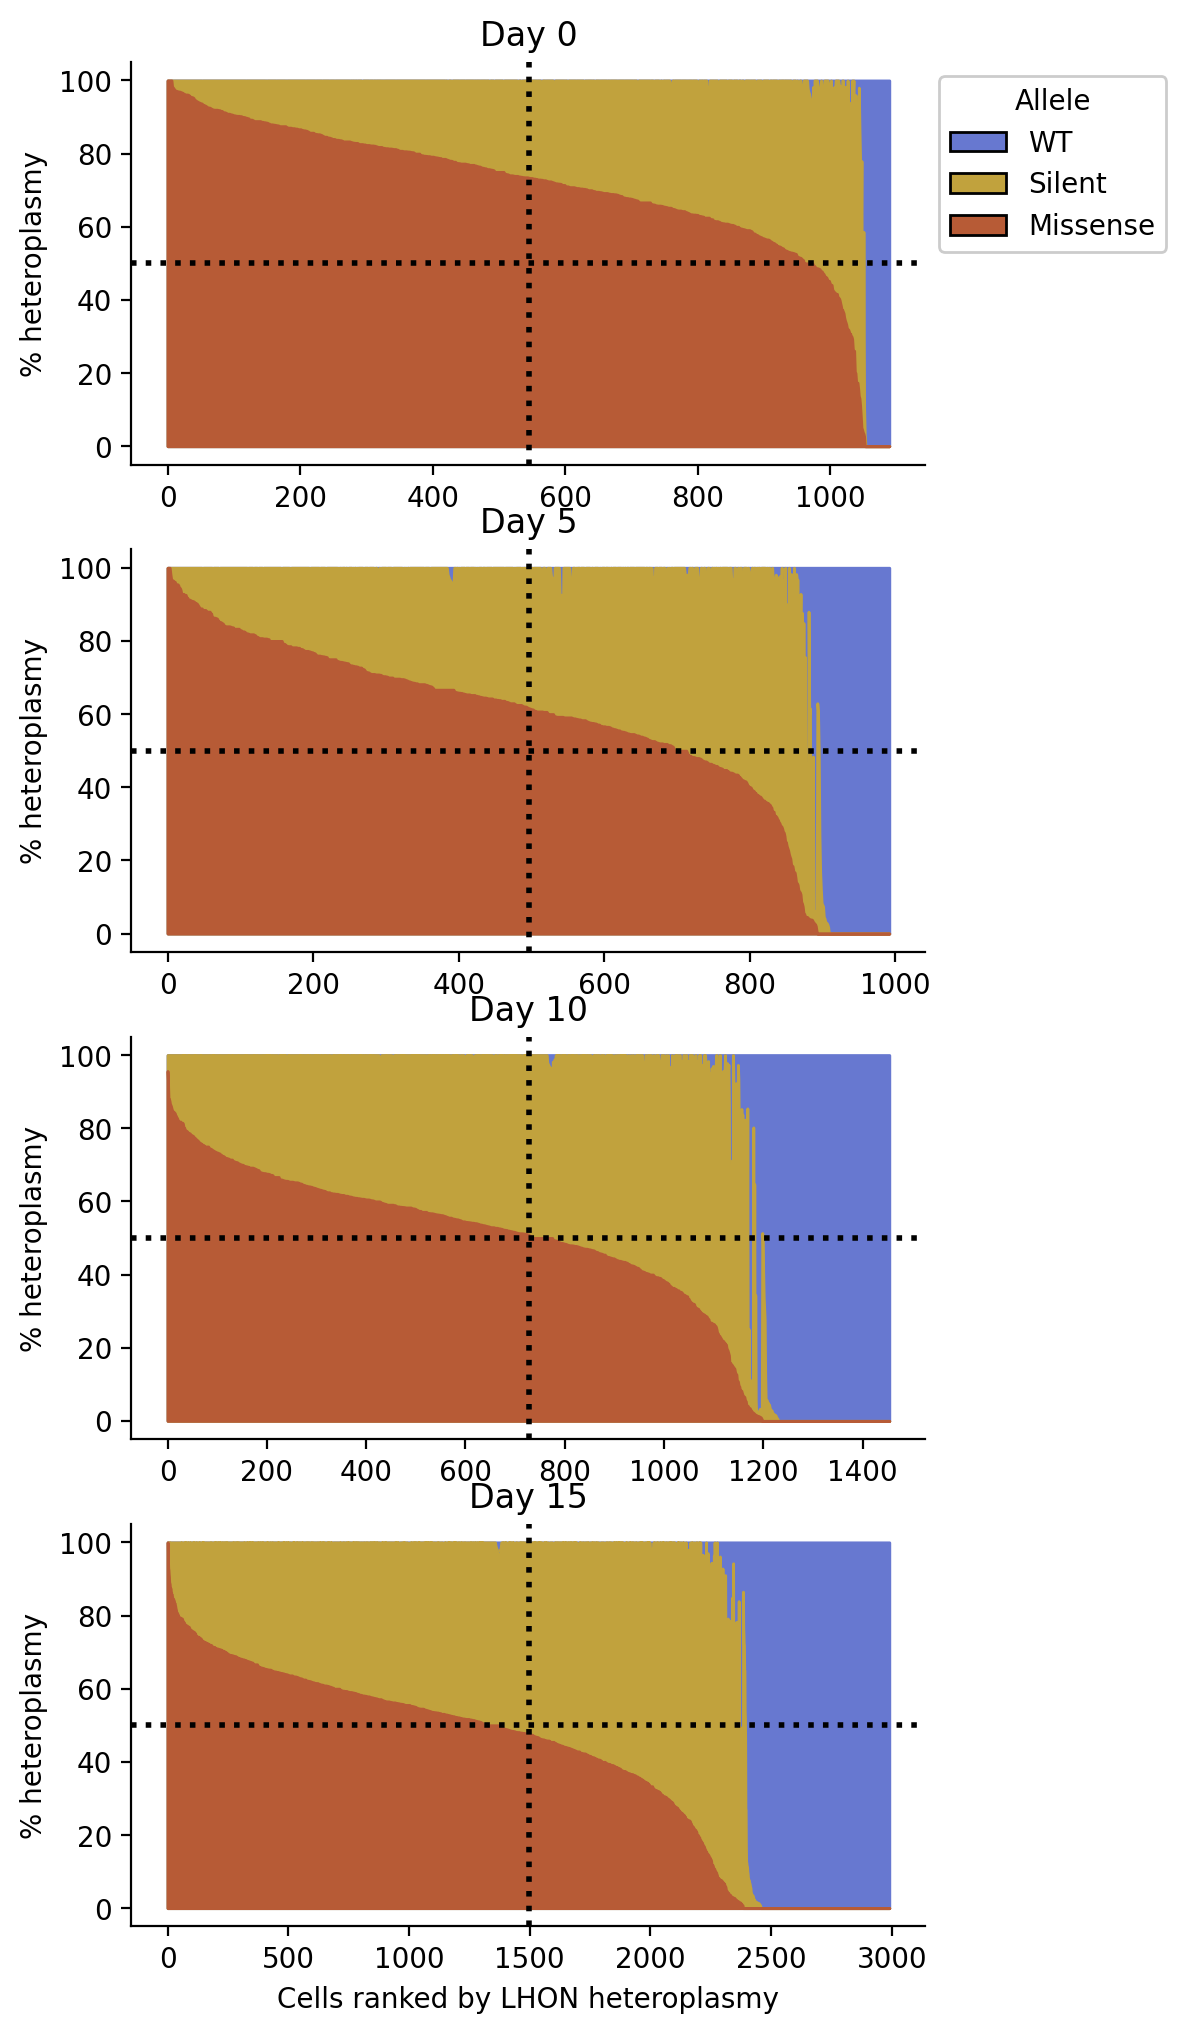

In [24]:
fig, axes = pyplot.subplots(nrows=4, ncols=1, figsize=(5,10))

for ax in axes:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

wt_color = (103/255,120/255,208/255,1)
silent_color = (193/255,162/255,61/255,1)
missense_color = (183/255,91/255,54/255,1)

d0_data = scilite_data[scilite_data['condition_no_rep'] == 'd0_lhon'].sort_values(by=['LHON_het', 'SILENT_ONLY_het'], ascending=[False, False])
xvals = numpy.arange(d0_data.shape[0])
axes[0].fill_between(xvals, 1.0, color=wt_color, label='WT')
axes[0].fill_between(xvals, d0_data['total_het'].to_numpy(), color=silent_color, label='Silent')
axes[0].fill_between(xvals, d0_data['LHON_het'].to_numpy(), color=missense_color, label='Missense')
axes[0].axhline(0.5, linestyle='dotted', linewidth=2, color='k')
axes[0].axvline(len(xvals)/2, linestyle='dotted', linewidth=2, color='k')
axes[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[0].set_yticklabels([0, 20, 40, 60, 80, 100])
axes[0].set_ylabel('% heteroplasmy')
axes[0].set_title('Day 0')

d5_data = scilite_data[scilite_data['condition_no_rep'] == 'd5_lhon'].sort_values(by=['LHON_het', 'SILENT_ONLY_het'], ascending=[False, False])
xvals = numpy.arange(d5_data.shape[0])
axes[1].fill_between(xvals, 1.0, color=wt_color, label='WT')
axes[1].fill_between(xvals, d5_data['total_het'].to_numpy(), color=silent_color, label='Silent')
axes[1].fill_between(xvals, d5_data['LHON_het'].to_numpy(), color=missense_color, label='Missense')
axes[1].axhline(0.5, linestyle='dotted', linewidth=2, color='k')
axes[1].axvline(len(xvals)/2, linestyle='dotted', linewidth=2, color='k')
axes[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[1].set_yticklabels([0, 20, 40, 60, 80, 100])
axes[1].set_ylabel('% heteroplasmy')
axes[1].set_title('Day 5')

d10_data = scilite_data[scilite_data['condition_no_rep'] == 'd10_lhon'].sort_values(by=['LHON_het', 'SILENT_ONLY_het'], ascending=[False, False])
xvals = numpy.arange(d10_data.shape[0])
axes[2].fill_between(xvals, 1.0, color=wt_color, label='WT')
axes[2].fill_between(xvals, d10_data['total_het'].to_numpy(), color=silent_color, label='Silent')
axes[2].fill_between(xvals, d10_data['LHON_het'].to_numpy(), color=missense_color, label='Missense')
axes[2].axhline(0.5, linestyle='dotted', linewidth=2, color='k')
axes[2].axvline(len(xvals)/2, linestyle='dotted', linewidth=2, color='k')
axes[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[2].set_yticklabels([0, 20, 40, 60, 80, 100])
axes[2].set_ylabel('% heteroplasmy')
#axes[2].set_xlabel('Cells ranked by LHON heteroplasmy')
axes[2].set_title('Day 10')

d15_data = scilite_data[scilite_data['condition_no_rep'] == 'd15_lhon'].sort_values(by=['LHON_het', 'SILENT_ONLY_het'], ascending=[False, False])
xvals = numpy.arange(d15_data.shape[0])
axes[3].fill_between(xvals, 1.0, color=wt_color, label='WT')
axes[3].fill_between(xvals, d15_data['total_het'].to_numpy(), color=silent_color, label='Silent')
axes[3].fill_between(xvals, d15_data['LHON_het'].to_numpy(), color=missense_color, label='Missense')
axes[3].axhline(0.5, linestyle='dotted', linewidth=2, color='k')
axes[3].axvline(len(xvals)/2, linestyle='dotted', linewidth=2, color='k')
axes[3].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[3].set_yticklabels([0, 20, 40, 60, 80, 100])
axes[3].set_ylabel('% heteroplasmy')
axes[3].set_xlabel('Cells ranked by LHON heteroplasmy')
axes[3].set_title('Day 15')

axes[0].legend(loc='upper left', bbox_to_anchor=[1,1], title='Allele', framealpha=1.0)
for ha in axes[0].legend_.legendHandles:
    ha.set_edgecolor('k')

fig.savefig('./stacked_bar_heteroplasmy_plots.pdf', bbox_inches='tight')
fig.tight_layout()

### Check some statistics

In [3]:
scilite_data = pandas.read_csv('./heteroplasmy_dataframe.csv')
scilite_data.columns = scilite_data.columns.str.replace('_HET', '_het')
scilite_data['condition_no_rep'] = scilite_data['condition'].str.split('_r', expand=True)[0]
print(scilite_data.shape)
scilite_data.head()

(15078, 14)


,cell_id,condition,umi_count,LHON,LHON/SILENT,SILENT,WT,umi_count_for_filtering,umi_count_rank,LHON_het,SILENT_het,SILENT_ONLY_het,total_het,condition_no_rep
0,A1-CCGTGAGA-TGCCAGCC,d5_silent_r1,61,0,0,52,9,61,3649,0.000000,0.852459,0.852459,0.852459,d5_silent
1,A1-ACGCTCGA-TGTCTCAT,d0_silent_r3,65,0,0,61,4,65,3091,0.000000,0.938462,0.938462,0.938462,d0_silent
2,A1-AGTACAAG-GCATGCCG,d0_lhon_r3,44,0,32,12,0,44,7158,0.727273,1.000000,0.272727,1.000000,d0_lhon
3,A1-ACTCTTAG-GTTGCTGT,d10_silent_r3,64,0,0,47,17,64,3223,0.000000,0.734375,0.734375,0.734375,d10_silent
4,A1-CGAACTTA-TGCCAGCC,d5_silent_r1,93,0,0,91,2,93,1068,0.000000,0.978495,0.978495,0.978495,d5_silent


In [4]:
scilite_data.groupby('condition_no_rep')[['LHON_het', 'SILENT_ONLY_het']].mean()

,LHON_het,SILENT_ONLY_het
condition_no_rep,,
d0_lhon,0.697739,0.254306
d0_silent,0.000430,0.724744
d10_lhon,0.431317,0.352583
d10_silent,0.000495,0.727560
d15_lhon,0.396789,0.360196
d15_silent,0.000546,0.721838
d5_lhon,0.559071,0.309835
d5_silent,0.000447,0.725428


In [15]:
scilite_data['lt70'] = scilite_data['LHON_het'] < 0.7
counts = scilite_data.loc[scilite_data['condition_no_rep'] == 'd10_lhon'].groupby('condition')['lt70'].value_counts()
print(counts)
frac_lt70_list = []
for condition in counts.index.levels[0]:
    frac_lt70 = counts[condition][True]/counts[condition].sum()
    frac_lt70_list.append(frac_lt70)
    print(f'{frac_lt70} of {condition} have heteroplasmy less than 70%.')
print(f'{numpy.mean(frac_lt70_list)} +/- {stats.sem(frac_lt70_list)} LHON day 10 cells have het < 70%')

condition    lt70 
d10_lhon_r1  True     463
             False     64
d10_lhon_r2  True     341
             False     35
d10_lhon_r3  True     498
             False     54
Name: lt70, dtype: int64
0.8785578747628083 of d10_lhon_r1 have heteroplasmy less than 70%.
0.9069148936170213 of d10_lhon_r2 have heteroplasmy less than 70%.
0.9021739130434783 of d10_lhon_r3 have heteroplasmy less than 70%.
0.8958822271411027 +/- 0.008769627760917437 LHON day 10 cells have het < 70%


In [18]:
scilite_data['LHON_pct'] = scilite_data['LHON_het'] * 100

In [19]:
scilite_data['lt70'] = scilite_data['LHON_het'] < 0.7
counts = scilite_data.loc[scilite_data['condition_no_rep'] == 'd10_lhon'].groupby('condition')['lt70'].value_counts()
print(counts)
frac_lt70_list = []
for condition in counts.index.levels[0]:
    frac_lt70 = (counts[condition][True]/counts[condition].sum())*100
    frac_lt70_list.append(frac_lt70)
    print(f'{frac_lt70} of {condition} have heteroplasmy less than 70%.')
print(f'{numpy.mean(frac_lt70_list)} +/- {numpy.std(frac_lt70_list)} LHON day 10 cells have het < 70%')

condition    lt70 
d10_lhon_r1  True     463
             False     64
d10_lhon_r2  True     341
             False     35
d10_lhon_r3  True     498
             False     54
Name: lt70, dtype: int64
87.85578747628084 of d10_lhon_r1 have heteroplasmy less than 70%.
90.69148936170212 of d10_lhon_r2 have heteroplasmy less than 70%.
90.21739130434783 of d10_lhon_r3 have heteroplasmy less than 70%.
89.58822271411026 +/- 1.240212651645301 LHON day 10 cells have het < 70%


In [13]:
463/(463+64)

0.8785578747628083